# Imports

In [1]:
using Pkg
using Plots
using Printf
Pkg.instantiate()
Pkg.precompile()

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/jaime/PhD/LimberJack.jl/Manifest.toml:0
Precompiling project...
  ✓ LimberJack
  1 dependency successfully precompiled in 4 seconds (74 already precompiled)
Precompiling project...
  ✓ LimberJack
  1 dependency successfully precompiled in 4 seconds (74 already precompiled)


In [2]:
include("/home/jaime/PhD/LimberJack.jl/src/LimberJack.jl")

Main.LimberJack

In [3]:
params = LimberJack.CosmoPar(0.26, 0.05, 0.67, 0.96, 0.811, 2.725/2.7)
cosmology = LimberJack.Cosmology(params, tk_mode="EisHu");
z = [0, 1, 2];
k = [0.001, 0.01, 0.1, 1, 10];

In [4]:
PkL = cosmology.lin_Pk(0, cosmology.ks)
Pk = cosmology.Pk(0, cosmology.ks);

In [5]:
print(cosmology.Pk(0,k))

[33299.75034929149, 121645.47358418266, 11432.274775070146, 848.5276758145638, 13.42307032653234]

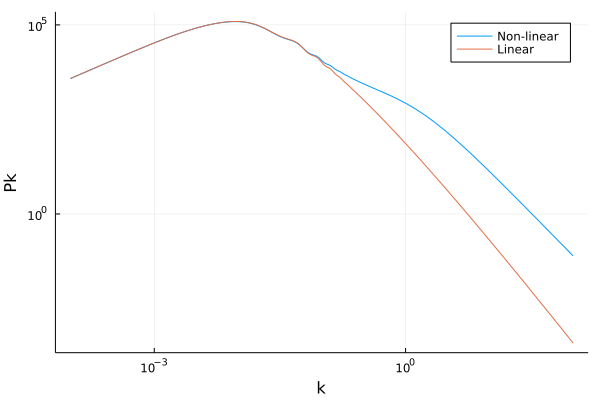

In [6]:
plot(cosmology.ks, Pk, yaxis=:log, xaxis=:log, label = "Non-linear")
plot!(cosmology.ks, PkL, yaxis=:log, xaxis=:log, label = "Linear")
xlabel!("k")
ylabel!("Pk")

In [7]:
wz = @. exp(-0.5*((cosmology.zs-0.5)/0.05)^2)
numbercounts = LimberJack.NumberCountsTracer(cosmology, cosmology.zs, wz, 2.);
weaklensing = LimberJack.WeakLensingTracer(cosmology, cosmology.zs, wz);
cmblensing = LimberJack.CMBLensingTracer(cosmology);

In [8]:
ls = [10, 30, 100, 300];

In [9]:
[LimberJack.angularCℓ(cosmology, numbercounts,
                     numbercounts, l) for l in ls]

4-element Vector{Float64}:
 0.00010774883056090774
 0.0001046600868076908
 3.2981329040150264e-5
 5.869947658755129e-6

In [10]:
[LimberJack.angularCℓ(cosmology, numbercounts,
                     weaklensing, l) for l in ls]

4-element Vector{Float64}:
 1.0303327569712498e-7
 9.170606698128816e-8
 2.6786408128439514e-8
 4.90917459565573e-9

In [11]:
[LimberJack.angularCℓ(cosmology, weaklensing,
                     weaklensing, l) for l in ls]

4-element Vector{Float64}:
 1.848058260906912e-8
 7.2086728040846925e-9
 1.5193343570964597e-9
 3.787784947283588e-10

In [12]:
[LimberJack.angularCℓ(cosmology, numbercounts,
                     cmblensing, l) for l in ls]

4-element Vector{Float64}:
 1.7027245887867418e-6
 1.6472919005162763e-6
 5.16065335940779e-7
 9.314047087638559e-8

In [13]:
[LimberJack.angularCℓ(cosmology, weaklensing,
                     cmblensing, l) for l in ls]

4-element Vector{Float64}:
 3.2757184684036385e-8
 1.4711677337610191e-8
 3.275240353319159e-9
 7.58230871288392e-10